In [1]:
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [2]:
"""Common plotting subroutines."""

import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


kwargs = {'linewidth' : 3.5}
font = {'weight' : 'normal', 'size'   : 24}


def error_plot(ys, yscale='log'):
    plt.figure(figsize=(8, 8))
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale(yscale)
    plt.plot(range(len(ys)), ys, **kwargs)
    

def convergence_plot(fs, gs):
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.title('Convergence in objective')    
    plt.xlabel('Step')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.plot(range(len(fs)), fs, **kwargs)
    plt.subplot(122)
    plt.title('Convergence in domain')    
    plt.xlabel('Step')
    plt.yscale('log')
    plt.plot(range(len(gs)), gs, **kwargs)
    plt.tight_layout()


def setup_layout():
    display(HTML(open('custom.html').read()))
    matplotlib.rc('font', **font)


In [3]:
def quadratic(A, b, x):
    """Quadratic defined by A and b at x."""
    return 0.5 * x.dot(A.dot(x)) - b.dot(x)

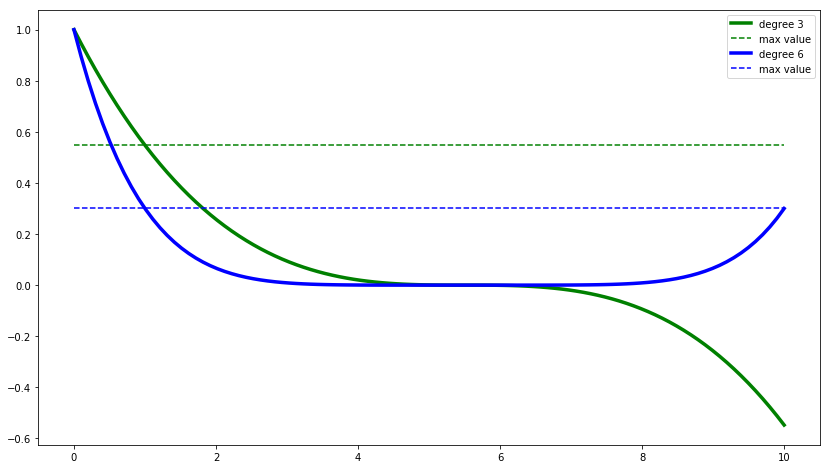

In [4]:
def p(k, x, alpha=1.0, beta=10.0):
    return np.power(1.0 - 2.0*x/(alpha+beta), k)

alpha, beta = 1.0, 10.0
xs = np.linspace(0, beta, 100)
plt.figure(figsize=(14, 8))
plt.plot(xs, p(3, xs), 'g-', label='degree 3', **kwargs)
plt.plot(xs, [p(3, alpha)]*len(xs), 'g--', label='max value')
plt.plot(xs, p(6, xs), 'b-', label='degree 6', **kwargs)
plt.plot(xs, [p(6, alpha)]*len(xs), 'b--', label='max value')
plt.legend()
pp = PdfPages('figures/lecture6-naive_polynome.pdf')
plt.savefig(pp, format='pdf')

In [5]:
def T(k, a):
    """Chebyshev polynomial of degree k"""
    if k <= 1:
        return a**k
    else:
        return 2.0*a*T(k-1, a) - T(k-2, a)

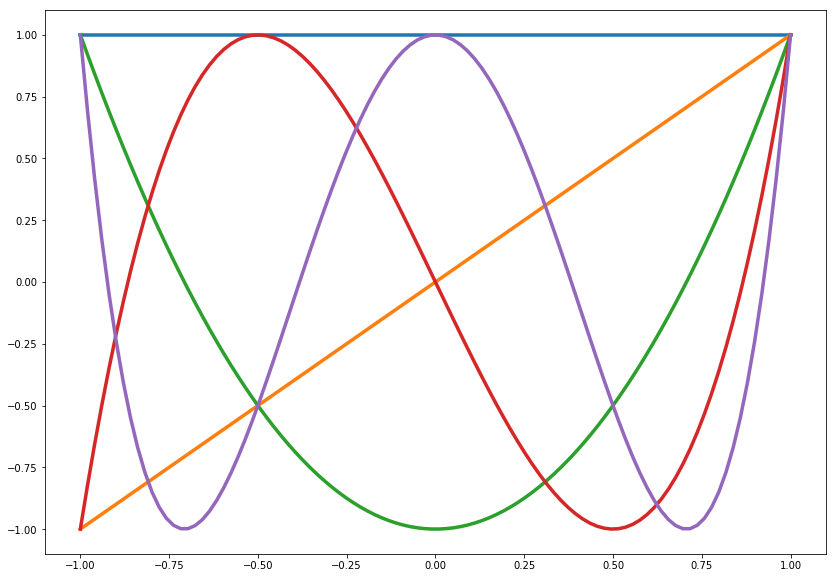

In [6]:
xs = np.linspace(-1, 1, 100)
plt.figure(figsize=(14, 10))
_ = [plt.plot(xs, T(k, xs), **kwargs) for k in range(0, 5)]
pp = PdfPages('figures/lecture6-cheb_polynome.pdf')
plt.savefig(pp, format='pdf')

In [7]:
def P(k, a, alpha=1, beta=10.0):
    """Rescaled Chebyshev polynomial."""
    assert beta > alpha
    normalization = T(k, (beta+alpha)/(beta-alpha))
    return T(k, (beta+alpha-2*a)/(beta-alpha))/normalization

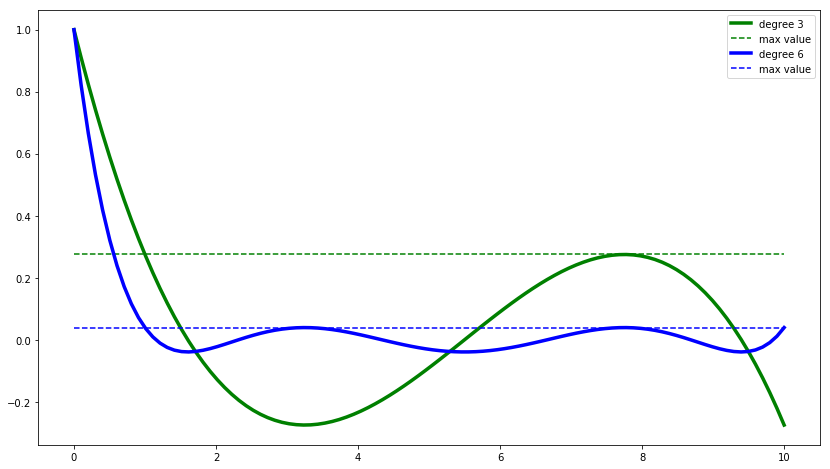

In [8]:
alpha, beta = 1.0, 10.0
xs = np.linspace(0, beta, 100)
plt.figure(figsize=(14, 8))
plt.plot(xs, P(3, xs), 'g-', label='degree 3', **kwargs)
plt.plot(xs, [P(3, alpha)]*len(xs), 'g--', label='max value')
plt.plot(xs, P(6, xs), 'b-', label='degree 6', **kwargs)
plt.plot(xs, [P(6, alpha)]*len(xs), 'b--', label='max value')
plt.legend();
pp = PdfPages('figures/lecture6-rescaled_cheb.pdf')
plt.savefig(pp, format='pdf')

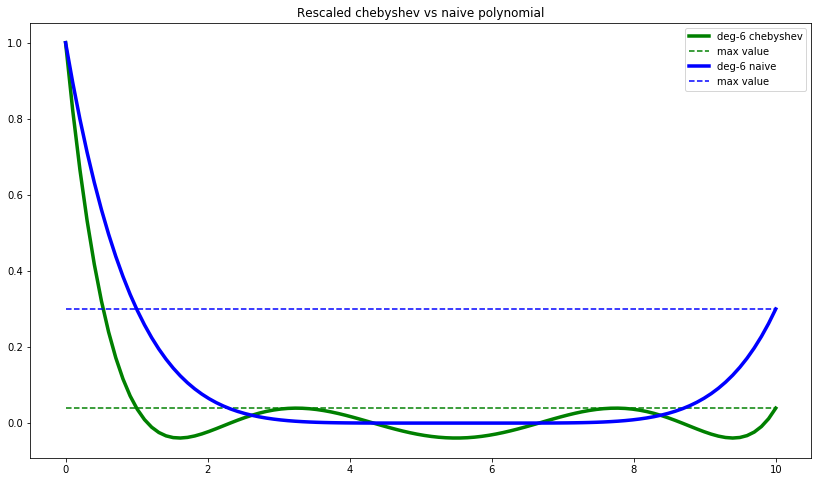

In [9]:
plt.figure(figsize=(14, 8))
plt.title('Rescaled chebyshev vs naive polynomial')
plt.plot(xs, P(6, xs), 'g-', label='deg-6 chebyshev', **kwargs)
plt.plot(xs, [P(6, alpha)]*len(xs), 'g--', label='max value')
plt.plot(xs, p(6, xs), 'b-', label='deg-6 naive', **kwargs)
plt.plot(xs, [p(6, alpha)]*len(xs), 'b--', label='max value')
plt.legend();
pp = PdfPages('figures/lecture6-rescaled_cheb_vs_naive.pdf')
plt.savefig(pp, format='pdf')

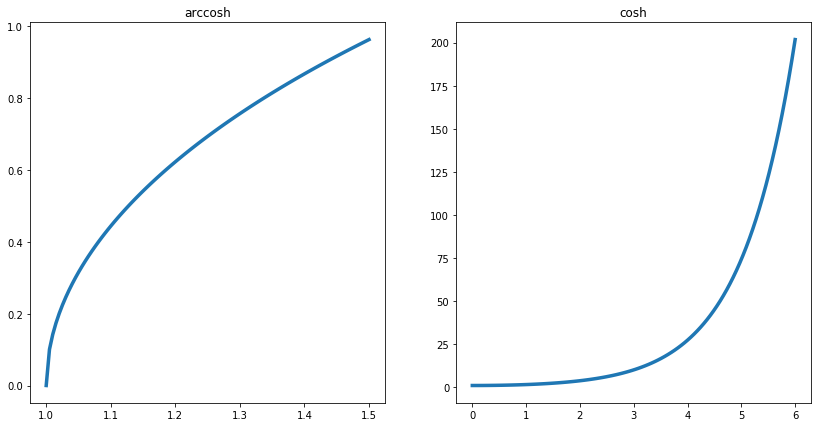

In [10]:
vs = np.linspace(1., 1.5, 100)
plt.figure(figsize=(14, 7))
plt.subplot(121, title="arccosh")
plt.plot(vs, np.arccosh(vs), **kwargs)
plt.subplot(122, title="cosh")
vs = np.linspace(0, 6, 100)
plt.plot(vs, np.cosh(vs), **kwargs);

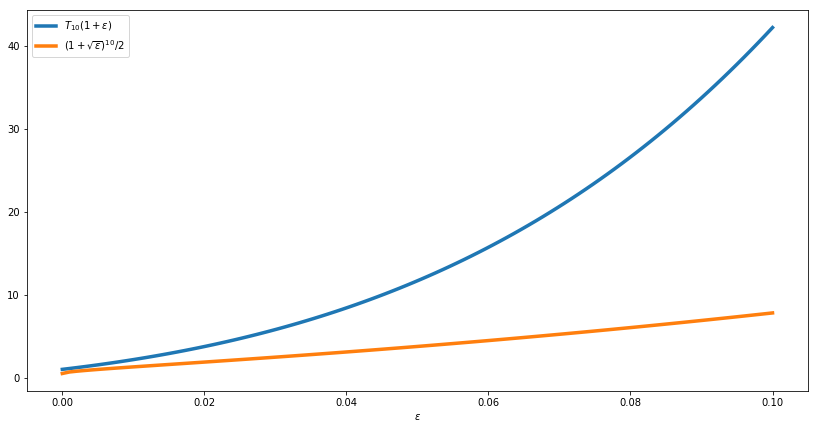

In [17]:
plt.figure(figsize=(14,7))
epsilons = np.linspace(0., 0.1, 100)
plt.xlabel('$\epsilon$')
plt.plot(epsilons, T(10, 1+epsilons), 
         label='$T_{10}(1+\epsilon)$', **kwargs)
plt.plot(epsilons, (1+np.sqrt(epsilons))**10/2, 
         label='$(1+\sqrt{\epsilon})^{10}/2$', **kwargs)
plt.legend();
plt.savefig('figures/lecture6-conv.pdf')